<a href="https://colab.research.google.com/github/JLuceroVasquez/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto Alura Store
El señor Juan desea conocer con base a sus datos de ventas ¿Qué tienda debe cerrar? Para ello se calculó 5 métricas y elaboró 8 gráficos que se analizaron en un reporte que concluye recomendando la venta de la tienda N° 4. El presente trabajo se divide en las siguientes secciones, indicando las bibliotecas empleadas en cada una:

**1. Preparando el entorno**
- Instalación e importación de librerías y módulos (python, pandas, maplotlib, seaborn y plotly)
- Importación de datos en dataframes (pandas)
- Importación de datos en listas de diccionarios (python)

**2. Cálculo de métricas**
- Métrica 1: Ingreso total por cada tienda (python)
- Métrica 2: Ventas por categoría (pandas)
- Métrica 3: Valoración media por tienda (python)
- Métrica 4: Productos más vendidos y menos vendidos (pandas)
- Métrica 5: Valor del envío promedio por tienda (python)

**3. Gráficos de desempeño financiero**
- Gráfico 1 del desempeño financiero: Piechart de la distribución de ventas por cada tienda (pandas y maplotlib)
- Gráfico 2 del desempeño financiero: Gráfico de línea con el resultado del ejercicio (Ingreso total menos valor de envío total) (pandas y maplotlib)

**4. Gráfico de imagen institucional**
- Gráfico 3 de la imagen institucional: Gráfico de cajas y bigotes con la distribución en cuartiles de la calificación recibida por las tiendas (pandas, seaborn y maplotlib)

**5. Gráfico de desempeño geográfico**
- Gráfico 1, 2, 3 y 4 del desempeño geográfico: 4 gráficos de mapas de calor correspondiente a las ventas según ubicación geográfica por cada tienda (pandas, plothy y maplotlib)
- Gráfico 5 del desempeño geográfico: 1 gráfico de barras agrupadas correspondiente a las calificaciones promedios recibidas por cada tienda según el lugar de compra (pandas y maplotlib)

**6. Informe final**

## 1. Preparando el entorno



### Instalación de requisitos

#### Instalamos las librerías: *Pandas, Matplotlib, Seaborn y Plotly*
1. **Instala Python 3.11.9** desde el sitio oficial: https://www.python.org/downloads/
    - Asegúrate de marcar la opción “Add Python to PATH” durante la instalación.

2. **Copia el proyecto completo** incluyendo los archivos requirements.txt y .gitignore.

3. Abre **Visual Studio Code** (o cualquier otro IDE) desde la carpeta del proyecto y abre una terminal integrada.
4. **Crea un entorno virtual:**
    - En Windows, ejecutar: *python -m venv venv*

    - En Linux o MacOS, ejecutar: *python3 -m venv venv*
5. **Activa el entorno virtual:**
    - En GitBash o PowerShell (Window), ejecutar: *source venv/Scripts/activate*
    
      En Window, se puede ejecutar también: *.\venv\Scripts\Activate.ps1*
    - En Linux o MacOS, ejecutar: *source venv/bin/activate*
6. **Instalar las dependencias:**
    - Ejecutar: *pip install -r requirements.txt*

Con estos pasos instalamos todas las dependencias en un entorno virtual aislado que harán funcionar nuestro código en cualquier dispositivo con Python 3.11+ y acceso a internet.
Ahora, cada vez que se abra el proyecto y se deba seleccionar el kernell con el que se ejecutará el código, elegiremos el entorno virtual creado venv.

In [ ]:
# Importamos las liberías Pandas, Matlplotlib , Seaborn y Plotly. Importandos los módulos de matplotlib y plotly diseñados exclusivamente para crear gráficos.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D # Para la creación manual de leyendas en los gráficos
from matplotlib.ticker import FuncFormatter # Para personalizar los valores que se muestran en las de los ejes
from matplotlib import cbook # Para obtener las estadísticas que usan los gráfico de cajas y bigotes.

# Importamos el módulo CSV y la función urlopen de la biblioteca estándar de Python.
import csv #Este módulo permite leer y escribir archivos csv con Python
from urllib.request import urlopen #Esta función permite abrir archivos CSV

### Método de importación 1: Con Pandas

In [ ]:
# Nombramos variables por cada archivo csv que importaremos.
url1 = "https://raw.githubusercontent.com/JLuceroVasquez/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/JLuceroVasquez/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/JLuceroVasquez/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/JLuceroVasquez/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Con el método read_csv generamos un dataframe de pandas por cada archivo, y los asignamos a variables.
tienda1_pd = pd.read_csv(url1)
tienda2_pd = pd.read_csv(url2)
tienda3_pd = pd.read_csv(url3)
tienda4_pd = pd.read_csv(url4)

# Creamos una lista con los nombres de los dataframe creados.
lista_tiendas_pd = [tienda1_pd, tienda2_pd, tienda3_pd, tienda4_pd]

# Unificamos los dataframe en un solo dataframe general con concat. Esto nos permitirá hacer modificaciones más rápido: Calculo de nuevos campos y agrupamiento de filas.
tiendas_pd_unificado = pd.concat(
    # Se listan los dataframe que se unirán.
    [tienda.assign(Tienda=f'Tienda {i+1}') for i,tienda in enumerate(lista_tiendas_pd)], # Mediante el método assign se añade una columna con el nombre de la tienda a la que corresponden los datos.
    # Se unen los dataframe mediante en el eje cero (unión vertical).
    axis= 0,
    # Se ignoran los índices de los dataframe originales, estableciendo nuevos índices para el dataframe unificado.
    ignore_index= True,
)

# Mostramos como ejemplo las primeras filas del dataframe unificado para visualizar que se cargaron correctamente los datos.
tiendas_pd_unificado.head(5)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


### Método de importación 2: Con funciones de la biblioteca estándar de Python

In [ ]:
# Creamos la función leer_csv que permite cargar los datos en listas de diccionarios empleando funciones de la biblioteca estándar de Python.
def leer_csv(url: str="") -> list:
    '''Función para cargar los datos de archivos csv en una lista de diccionarios

    url: str, default ""
        Variable asociada al url del archivo csv
    return = datos: list
        Lista de diccionarios con los datos del archivo csv
    '''
    # Se crea la lista vacía datos que almacenará los diccionarios, siendo cada diccionario una línea del archivo csv.
    datos = []

    # Abrir la url como si de un archivo se tratase.
    with urlopen(url) as respuesta:

        # Se decodifica en utf-8 cada línea del archivo.
        lineas = respuesta.read().decode('utf-8').splitlines()

        # Se convierte cada línea en un diccionario.
        lector = csv.DictReader(lineas)

        # Se añade cada diccionario a la lista datos.
        for linea in lector:
            datos.append(linea)

    #Retornamos la lista de diccionarios
    return datos

# Con la función generamos una lista de diccionarios por cada archivo, y las asignamos a variables.
tienda1_py=leer_csv(url1)
tienda2_py=leer_csv(url2)
tienda3_py=leer_csv(url3)
tienda4_py=leer_csv(url4)

# Creamos una lista que contenga los datos de las 4 tiendas
tiendas_py = [tienda1_py, tienda2_py, tienda3_py, tienda4_py]

# Mostramos como ejemplo el primer elemento de lista tienda1_py para comprobar que se crearon correctamente las listas.
tienda1_py[0]

{'Producto': 'Asistente virtual',
 'Categoría del Producto': 'Electrónicos',
 'Precio': '164300.0',
 'Costo de envío': '6900.0',
 'Fecha de Compra': '16/01/2021',
 'Vendedor': 'Pedro Gomez',
 'Lugar de Compra': 'Bogotá',
 'Calificación': '4',
 'Método de pago': 'Tarjeta de crédito',
 'Cantidad de cuotas': '8',
 'lat': '4.60971',
 'lon': '-74.08175'}

## 2. Cálculo de métricas
En esta sección, se intercaló el uso de las funciones de la librería estándar de Python y las funciones de la librería Pandas. Ello con la finalidad de mostrar dos de los muchos posibles caminos para el análisis de datos en Python.



### Métrica 1: Ingreso total por cada tienda
Para el cálculo de la métrica 1 se emplearán las funciones nativas de Python. El ingreso se define como el dinero percibido por las tiendas al efectuar la venta. Es decir, es la **suma de los valores correspondientes a la columna Precio**.

In [ ]:
# Creamos la función que suma los valores de la columna Precio.
def calcular_ingresos(datos: list=[0]) -> float:
    '''Función que suma los valores cuya clave es Precio en los diccionarios

    datos: list, default [0]
        Son los datos de ventas de la tienda evaluada

    return = ingresos: float
        Suma de los precios de los productos vendidos en la tienda evaluada
    '''
    # Se crea una variable que contendrá la suma de precios.
    ingresos = 0

    # Se crea una lista que contendrá las claves que podrían contener el precio.
    claves = ['precio','Precio']

    # Se itera en la lista "datos".
    for i,diccionario in enumerate(datos):

        # Se prueba todas las claves válidas.
        for clave in claves:

            # Se verifica la condición de que alguna de las claves válidas sea clave en el diccionario.
            if clave in diccionario:

                # Si alguna de las palabras es clave en el diccionario, se intenta convertir su valor a decimal.
                try:
                    ingresos += float(diccionario[clave])

                # Si el valor no se puede convertir en un decimal, se produce un ValueError que se maneja en except.
                except ValueError:

                    # Se ignorar el valor que no se puede convertir en un decimal.
                    continue

                #Salir del bucle for si encontró una clave válida (condición = TRUE), sin importar que haya sido posible o no convertir su valor en decimal
                break

        # Al agotarse las claves válidas, sin que ninguna haya cumplido la condición de encontrarse en el diccionario (condición = FALSE), se devuelve un KeyError.
        else:
            raise KeyError(f'No se encuentra ninguna de estas palabras en el diccionario n° {i+1}: {claves}')

    # Retornamos la suma de los precios
    return ingresos

# Creamos una lista vacía que almacenará los ingresos calculados de cada tienda.
ingreso_total = []

# Aplicamos la función calcular_ingresos a las listas de diccionarios ya creadas con un ciclo for.
for i,datos in enumerate(tiendas_py):
    ingresos_tienda = calcular_ingresos(datos)

    # Añadimos el ingreso de la tienda a la lista ingresos_total
    ingreso_total.append(ingresos_tienda)

    # Imprimimos un mensaje con los resultados por tienda.
    print(f'Los ingresos de la tienda {i+1} son: ${ingresos_tienda:.2f}')

# Se muestra la suma los valores de la lista ingreso total.
print(f'Los ingresos totales son ${sum(ingreso_total):.2f}')

Los ingresos de la tienda 1 son: $1150880400.00
Los ingresos de la tienda 2 son: $1116343500.00
Los ingresos de la tienda 3 son: $1098019600.00
Los ingresos de la tienda 4 son: $1038375700.00
Los ingresos totales son $4403619200.00


### Métrica 2: Ventas por categoría
Para el cálculo de la métrica 2 se emplearán las funciones y métodos de Pandas para operar Dataframes. Las ventas se definen como dinero percibido (ingresos) y que espera recibir a futuro (cuotas). Es decir, las ventas son la **multiplicación de los valores correspondientes a las columnas Precio y Cantidad de cuotas**.

In [ ]:
# Convertimos los valores de "Precio" y "Cantidad de cuotas" a números.
tiendas_pd_unificado["Precio"] = tiendas_pd_unificado["Precio"].astype(float) #El método astype permite convertir los valores de toda una serie en cierto tipo de datos.
tiendas_pd_unificado["Cantidad de cuotas"] = tiendas_pd_unificado["Cantidad de cuotas"].astype(int)

# Calculamos el campo "Ventas" multiplicando las columnas "Precio" y "Cantidad de cuotas" del dataframe unificado.
tiendas_pd_unificado["Ventas"] = tiendas_pd_unificado["Precio"] * tiendas_pd_unificado["Cantidad de cuotas"]

# Reducimos el tamaño del dataframe agrupando las ventas según tienda y categoría, sumando los valores del campo "Ventas".
tiendas_pd_ventas = tiendas_pd_unificado.groupby(["Tienda","Categoría del Producto"])["Ventas"].sum().reset_index() # Con reset_index(), los índices actuales (campos bajo los que estamos agrupando los datos, Tienda y Categoría) se convierten en una serie de pandas (columna) y un nuevo índice se añade.
tiendas_pd_ventas = tiendas_pd_ventas.sort_values(by="Ventas", ascending=False) # Ordenamos el dataframe en orden descendente

# Definimos una función que genere mensajes con las ventas por categoría en cada tienda.
def imprimir_ventas(tienda: str=None): # No establecer un valor por defecto para el parámetro evita efectos secundarios si se modifica al llamar múltiple veces la función.
    '''Función que imprime texto con las ventas de cada tienda

    tienda: str, default None
        Es el nombre de la tienda evaluada
    '''
    # Filtramos las filas del dataframe correspondiente a la tienda pasada como argumento de la función.
    ventas_tienda = tiendas_pd_ventas[tiendas_pd_ventas["Tienda"]==tienda]
        # tiendas_pd_ventas['Tienda'] == tienda devuelve una serie booleana (True o False).
        # tiendas_pd_ventas[...] filtra solo las filas donde esa comparación sea True.

    # Imprimimos el nombre de la tienda a la que corresponden los datos
    print(f"\nVentas por categorías en la {tienda}")
    # Iteramos en las filas del dataframe tienda_pd para imprimir las ventas por categoría.
    for __,serie in ventas_tienda.iterrows(): # La serie contiene los datos de cada fila, y se comporta como un diccionario. El guión bajo _ es una convención en Python que significa: "no voy a usar esta variable".
        print(f'{serie["Categoría del Producto"]}: ${serie["Ventas"]:.2f}')

# Creamos una lista con los valores únicos de la columna "Tienda" del dataframe unificado
nombres_tiendas = tiendas_pd_unificado["Tienda"].unique()

# Ejecutamos la función calcular_ventas tantas veces como nombres de tiendas exista.
for tienda in nombres_tiendas:
    imprimir_ventas(tienda)

# Calculamos e imprimimos un mensaje con las ventas totales de las tiendas
ventas_totales = tiendas_pd_ventas["Ventas"].sum()
print(f"Las ventas totales son ${ventas_totales:.2f}")


Ventas por categorías en la Tienda 1
Electrónicos: $1290390700.00
Electrodomésticos: $1032375600.00
Muebles: $582928200.00
Instrumentos musicales: $276990500.00
Deportes y diversión: $126883700.00
Juguetes: $49062800.00
Artículos para el hogar: $38316800.00
Libros: $25769400.00

Ventas por categorías en la Tienda 2
Electrónicos: $1286643600.00
Electrodomésticos: $1026226300.00
Muebles: $527332100.00
Instrumentos musicales: $294448700.00
Deportes y diversión: $81660600.00
Juguetes: $46721200.00
Artículos para el hogar: $42739700.00
Libros: $31417000.00

Ventas por categorías en la Tienda 3
Electrónicos: $1101334500.00
Electrodomésticos: $1081380800.00
Muebles: $555092500.00
Instrumentos musicales: $250336000.00
Deportes y diversión: $123399200.00
Juguetes: $61190400.00
Artículos para el hogar: $44724600.00
Libros: $26358900.00

Ventas por categorías en la Tienda 4
Electrónicos: $1211446500.00
Electrodomésticos: $879089600.00
Muebles: $556628000.00
Instrumentos musicales: $222837200.00


### Métrica 3: Valoración media por tienda
Para el cálculo de la métrica 3 se emplearán las funciones nativas de Python. La valoración media se define como el **promedio de los valores asociados a la clave "Calificación"** en las listas de diccionario.

In [ ]:
# Definimos la función para calcular el promedio de los valores asociados a la claves Calificación.
def calcular_valoracion_media(datos: list = None) -> float:
    '''Función para calcular el promedio de las calificaciones recibida por una tienda

    datos: list, default None
        Es la lista de diccionarios que contiene los datos de ventas de una tienda

    return = valoracion_media: float
        La función devuelve la valoración media como un número decimal
    '''
    # Declaramos las variables que contendrán la suma de las calificaciones y cantidad de filas procesadas.
    calificaciones = 0
    filas_validas = 0

    # Listamos las claves que podrían contener el valor de las calificaciones.
    claves_validas = ["Calificación", "calificación", "Calificacion", "calificacion"]

    # Iteramos sobre las filas de datos.
    for indice, diccionario in enumerate(datos):

        # Probamos todas las claves validas.
        for clave in claves_validas:

            # Verificamos si cumple la condición de estar en el diccionario.
            if clave in diccionario:

                # Si la clave se encuentra en el diccionario, intentamos convertir el valor en un decimal.
                try:
                    calificacion = float(diccionario[clave])

                    # Sumamos la calificación a la variable calificaciones.
                    calificaciones += calificacion

                    # Aumentamos la variable filas_validas en 1.
                    filas_validas += 1

                # Si no se pudo convertir el valor en un decimal, ignoramos el error de tipo ValueError.
                except ValueError:

                    continue

                # Se haya o no convertido el valor en un decimal, salimos del bucle si se encontró una clave válida en el diccionario.
                break

        # Si no se encontró ninguna de las claves válidas en el diccionario (CONDICIÓN = FALSE), mostrar un error de tipo KeyError.
        else:
            raise KeyError(f'No se encuentra ninguna de estas palabras en el diccionario n° {indice+1}: {claves_validas}')

    # Calcular la valoración media de la tienda.
    valoracion_media = calificaciones/filas_validas

    # Devolver la valoración media calculada.
    return valoracion_media

# Creamos una variable que contendrá las valoraciones medias de las tiendas.
valoraciones_tiendas = []

# Ejecutar la función calcular_valoracion_media para cada una de las tiendas, y mostrar su valoración media en un mensaje.
for i,datos in enumerate(tiendas_py):
    valoracion_tienda = calcular_valoracion_media(datos)
    valoraciones_tiendas.append(valoracion_tienda)
    print(f'Valoración  media tienda N°{i+1}: {valoracion_tienda:.2f}')

# Promediamos las valoraciones medias y mostramo en un mensaje la valoración media global
valoracion_media_global = sum(valoraciones_tiendas)/len(valoraciones_tiendas)
print(f'Valoración media global: {valoracion_media_global:.2f}')

Valoración  media tienda N°1: 3.98
Valoración  media tienda N°2: 4.04
Valoración  media tienda N°3: 4.05
Valoración  media tienda N°4: 4.00
Valoración media global: 4.01


### Métrica 4: Productos más vendidos y menos vendidos
Para el cálculo de la métrica 4 se emplearán las funciones y métodos de Pandas para operar Dataframes. Se mostrarán la cantidad e ingresos de **los 3 productos más vendidos y los 3 menos vendidos** de cada tienda. Los ingresos son la suma de los valores de la serie (columna) Precio.

In [ ]:
# Convertimos los valores de la serie Precio del dataframe unificado en decimales, y renombramos la columna como Ingreso.
tiendas_pd_unificado["Ingreso"] = tiendas_pd_unificado["Precio"].astype(float) # Paso opcional pues ya se realizó para calcular la métrica 2.

# Agrupamos los ingresos según los productos vendidos en cada tienda.
tiendas_pd_productosvendidos = tiendas_pd_unificado.groupby(["Tienda", "Producto"])["Ingreso"].agg(Ingreso="sum",CantidadVendida="count").reset_index()
    # Con el método .agg (de "aggregate") se puede calcular más de una métrica. En este caso se calculó el ingreso y la cantidad vendida.
    # Con reset_index() se convierten los índices originales del dataframe agrupado("Tienda", "Producto") en columnas, y se crea un nuevo índice numerado.

# Definimos una función que imprima las ingresos correspondientes a los 3 productos más y menos vendidos.
def imprimir_productosvendidos(tienda: str = None):
    '''Función para imprimir mensajes con los 3 productos más y menos vendidos en la tienda

    tienda: str, default None
        Es el nombre de la tienda que se consultará
    '''

    # Filtramos el dataframe según el nombre de la tienda.
    tienda_pd = tiendas_pd_productosvendidos[tiendas_pd_productosvendidos["Tienda"]==tienda]

    # Se crean dos variables que almacenarán el df con los 3 productos más vendidos y el df los 3 productos menos vendidos.
    tienda_pd_productosmasvendidos = tienda_pd.sort_values(by='CantidadVendida', ascending=False).head(3)
    tienda_pd_productosmenosvendidos = tienda_pd.sort_values(by='CantidadVendida', ascending=True).head(3)

    # Se recorren cada fila del df con iterrow para imprimir la cantidad y el ingreso de los 3 producto más vendidos.
    print(f"\n{tienda} - Top 3 Productos más vendidos")

    for __,serie in tienda_pd_productosmasvendidos.iterrows(): # La serie contiene los datos de cada fila, y se comporta como un diccionario. El guión bajo _ es una convención en Python que significa: "no voy a usar esta variable".
        print(f'{serie["Producto"]}: Cantidad {serie["CantidadVendida"]} - Ingresos ${serie["Ingreso"]}')

    # Se recorren cada fila del df con iterrow para imprimir la cantidad y el ingreso de los 3 producto menos vendidos.
    print(f"\n{tienda} - Top 3 Productos menos vendidos")

    for __,serie in tienda_pd_productosmenosvendidos.iterrows():
        print(f'{serie["Producto"]}: Cantidad {serie["CantidadVendida"]} - Ingresos ${serie["Ingreso"]}')

# Creamos una lista con los nombres de las tiendas.
nombre_tiendas = tiendas_pd_unificado["Tienda"].unique() # Paso opcional pues ya se realizó para calcular la métrica 2.

# Ejecutamos la función para todas las tiendas.
for tienda in nombre_tiendas:
    imprimir_productosvendidos(tienda)


Tienda 1 - Top 3 Productos más vendidos
Armario: Cantidad 60 - Ingresos $29462300.0
TV LED UHD 4K: Cantidad 60 - Ingresos $142150200.0
Microondas: Cantidad 60 - Ingresos $34761500.0

Tienda 1 - Top 3 Productos menos vendidos
Auriculares con micrófono: Cantidad 33 - Ingresos $4730800.0
Celular ABXY: Cantidad 33 - Ingresos $32651000.0
Olla de presión: Cantidad 35 - Ingresos $2629300.0

Tienda 2 - Top 3 Productos más vendidos
Iniciando en programación: Cantidad 65 - Ingresos $3127800.0
Microondas: Cantidad 62 - Ingresos $36192000.0
Batería: Cantidad 61 - Ingresos $46175300.0

Tienda 2 - Top 3 Productos menos vendidos
Juego de mesa: Cantidad 32 - Ingresos $5811900.0
Impresora: Cantidad 34 - Ingresos $10385300.0
Mesa de comedor: Cantidad 34 - Ingresos $8637500.0

Tienda 3 - Top 3 Productos más vendidos
Kit de bancas: Cantidad 57 - Ingresos $16699800.0
Mesa de comedor: Cantidad 56 - Ingresos $14326100.0
Cama king: Cantidad 56 - Ingresos $38834700.0

Tienda 3 - Top 3 Productos menos vendidos

### Métrica 5: Valor del envío promedio por tienda
Para el cálculo de la métrica 5 se emplearán las funciones nativas de Python. El valor del envío promedio se define como el **promedio de los valores asociados a la clave "Costo de envío"** en las listas de diccionario.

In [ ]:
# Definimos la función para calcular el promedio de los valores asociados a la claves Costo de envío.
def calcular_costoenvio_promedio(datos: list = None) -> float:
    '''Función para calcular el promedio de los costos de envío incurridos por una tienda

    datos: list, default None
        Es la lista de diccionarios que contiene los datos de ventas de una tienda

    return = costoenvio_promedio: float
        La función devuelve el promedio del costo de envio como un número decimal
    '''
    # Declaramos las variables que contendrán la suma de los costos de envío y cantidad de filas procesadas.
    costos = 0
    filas_validas = 0

    # Listamos las claves que podrían contener el valor de los costos de envío.
    claves_validas = ["Costo de envío", "costo de envío", "Costo de envio", "costo de envio"]

    # Iteramos sobre las filas de datos.
    for indice, diccionario in enumerate(datos):

        # Probamos todas las claves validas.
        for clave in claves_validas:

            # Verificamos si cumple la condición de estar en el diccionario.
            if clave in diccionario:

                # Si la clave se encuentra en el diccionario, intentamos convertir el valor en un decimal.
                try:
                    costo = float(diccionario[clave])

                    # Sumamos el costo a la variable costos.
                    costos += costo

                    # Aumentamos la variable filas_validas en 1.
                    filas_validas += 1

                # Si no se pudo convertir el valor en un decimal, ignoramos el error de tipo ValueError.
                except ValueError:

                    continue

                # Se haya o no convertido el valor en un decimal, salimos del bucle si se encontró una clave válida en el diccionario.
                break

        # Si no se encontró ninguna de las claves válidas en el diccionario (CONDICIÓN = FALSE), mostrar un error de tipo KeyError.
        else:
            raise KeyError(f'No se encuentra ninguna de estas palabras en el diccionario n° {indice+1}: {claves_validas}')

    # Calcular el costo de envío promedio de la tienda.
    costoenvio_promedio = costos/filas_validas

    # Devolver el costo de envío promedio calculado.
    return costoenvio_promedio

# Creamos una variable que contendrá el costo de envío promedio de las tiendas.
costos_tiendas = []

# Ejecutar la función calcular_costoenvio_promedio para cada una de las tiendas, y mostrar su costo promedio en un mensaje.
for i,datos in enumerate(tiendas_py):
    costo_tienda = calcular_costoenvio_promedio(datos)
    costos_tiendas.append(costo_tienda)
    print(f'Costo envío promedio tienda N°{i+1}: ${costo_tienda:.2f}')

# Promediamos los costos de envio y mostramos en un mensaje el costo promedio global
costo_promedio_global = sum(costos_tiendas)/len(costos_tiendas)
print(f'Costo envío promedio global: ${costo_promedio_global:.2f}')

Costo envío promedio tienda N°1: $26018.61
Costo envío promedio tienda N°2: $25216.24
Costo envío promedio tienda N°3: $24805.68
Costo envío promedio tienda N°4: $23459.46
Costo envío promedio global: $24875.00


## 3. Gráficos de desempeño financiero

### Gráfico 1: Distribución de ingresos según tienda
Gráfico de pie con el porcentaje de ingresos generado por cada tienda del total. En el sector retail, **la disponibilidad de efectivo es vital** para pagar a los proveedores en el plazo otorgado o tener descuentos por pagar al instante. Con lo cual, las tiendas que generan una mayor fracción de los ingresos deben permanecer abiertas.

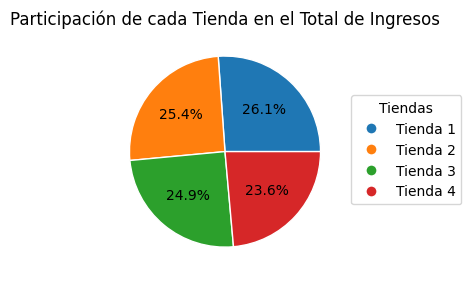

In [ ]:
# Se agrupan los ingresos según la tienda.
tiendas_pd_ingresos = tiendas_pd_unificado.groupby("Tienda")["Precio"].sum().reset_index()
tiendas_pd_ingresos

# Se especifican los datos numéricos que usará el gráfico de pie para definir la amplitud del segmento.
x = tiendas_pd_ingresos["Precio"]

# Asignamos un color a cada tienda mediante un mapa de colores categórico. Para ello, asociamos un número a cada categoría pues maplotlib espera un número para asignarle un color.
nombre_tiendas = tiendas_pd_ingresos["Tienda"] # Creamos una lista con los nombres de las tiendas.
diccionario_tiendas = {categoria: indice for indice, categoria in enumerate(nombre_tiendas)} # Se crea el diccionario "mapa_colores" que asigna un número a cada categoría (nombre de tienda).
color_tiendas = [plt.cm.tab10(diccionario_tiendas[tienda]) for tienda in nombre_tiendas] # Se genera un mapa de colores llamado "tab10", un color para cada tienda.

# Se crea una figura y un plano para nuestro gráfico con maplotlib.
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
    # Se crea una figura de 5 pulgadas de ancho y 2.7 pulgadas de alto.
    # Se establece un contorno limitado (constrained), es decir los elementos del gráficos se ajustarán a las dimensiones de la figura.

# Se genera un gráfico con el método pie.
ax.pie(x, colors = color_tiendas, autopct="%1.1f%%", wedgeprops={"linewidth": 1, "edgecolor": "white"})
    # Se creará un gráfico cuyas categorías con definidas por "X", y los colores de los segmentos por "colores".
    # Las secciones tendrán como etiqueta el porcentaje que representan del total y su formato será un número con un decimal.
    # Las secciones del gráfico tendrán bordes con un ancho de 1 pixel y serán de color blanco.

# Añadimos elementos gráficos como: Título y leyenda
ax.set_title("Participación de cada Tienda en el Total de Ingresos")

# Se crea una leyenda de forma manual
leyenda_g1 = [Line2D([0], [0], linewidth = 0, marker = "o", color="white", label = tienda,
                  markerfacecolor=plt.cm.tab10(diccionario_tiendas[tienda]), markersize=8) for tienda in nombre_tiendas]
    # Se traza una línea falsa, con un solo punto. Su grosor es cero, y color es blanco.
    # El punto tiene el marcador "o". La etiqueta del punto es el nombre de la tienda.
    # El color del marcador se define según el mapa de colores categórico llamado "tab10". El tamaño del marcador es 8 pixeles.

ax.legend(loc="lower left", bbox_to_anchor=(1,0.25) , handles=leyenda_g1, title="Tiendas")
    # La esquina inferior izquierda de la leyenda se ubica en la posición final del eje x (1) y en una posición intermedia del eje y (0.25).
    # La leyenda obtiene sus valores de la lista "leyenda", y se le asigna el título de "Tiendas".

# Mostramos el gráfico
plt.show()


### Gráfico 2: Porcentaje de ingresos respecto a las ventas según tienda
Gráfico de barras apiladas que muestra el porcentaje de ingresos respecto a las ventas generadas por cada tienda. En el sector retail, un mayor porcentaje de ingresos respecto a las ventas significa que la tienda está generando efectivo porque está cobrando más rapido a sus clientes lo que **disminuye el riesgo de incrobabilidad**.

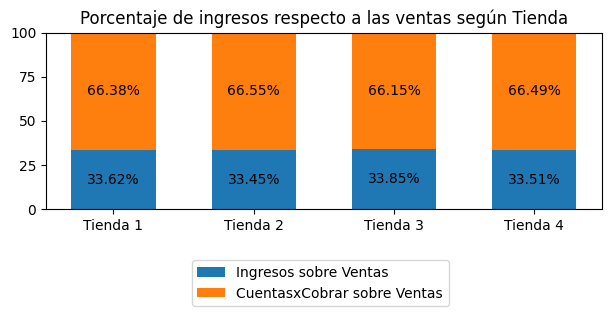

In [ ]:
# Agrupar los datos, de manera que existan tres series en el dataframe: Tienda, % de ingresos respecto ventas, % de cuentas por cobras respecto ventas
tiendas_pd_ingresos_cxc = tiendas_pd_unificado.groupby("Tienda").agg(
    Ingresos=pd.NamedAgg(column="Precio", aggfunc="sum"),
    Ventas=pd.NamedAgg(column="Ventas", aggfunc="sum")).reset_index()

tiendas_pd_ingresos_cxc["Ingresos sobre Ventas"] = (tiendas_pd_ingresos_cxc["Ingresos"]/tiendas_pd_ingresos_cxc["Ventas"])*100

tiendas_pd_ingresos_cxc["CuentasxCobrar sobre Ventas"] = 100 - tiendas_pd_ingresos_cxc["Ingresos sobre Ventas"]

# Establecemos los datos que usaremos en el gráfico: Categorías del eje X, Valores del eje Y, y Categorías de la barra
g2_categorias_eje_x = tiendas_pd_ingresos_cxc["Tienda"] #Nombre de las tiendas
g2_valores_eje_y = tiendas_pd_ingresos_cxc[["Ingresos sobre Ventas","CuentasxCobrar sobre Ventas"]] #Dataframe con las series "Ingresos/Ventas" "CxC/Ventas"

g2_ubicacion_base_barras=[] # Lista que contiene la ubicación en el eje Y de la base de las barras.
for i in range(0,len(g2_categorias_eje_x),1): # Mediante este ciclo for, se itera tantas veces como tiendas haya.
    g2_ubicacion_base_barras.append(0) # En cada iteración, se añade cero a la lista "ubicacion_base_barras". Así, todas las barras empiezan donde Y es cero.

# Se crea una figura y un plano para nuestro gráfico con maplotlib.
fig, ax = plt.subplots(figsize=(6, 3), layout="constrained")

# Se itera sobre el nombre y contenido de las series del dataframe que contiene los valores mostrados en el eje Y.
for nombre_serie, serie in g2_valores_eje_y.items():
    contenedor_g2 = ax.bar(g2_categorias_eje_x, serie, width=0.6, label = nombre_serie, bottom=g2_ubicacion_base_barras) # Se configuran las barras del gráfico
        # Se indican las categorías del eje X como los nombres de las tiendas.
        # Se añaden como valores del eje Y al contenido de la "serie"  del dataframe "valores_eje_y".
        # Se agrega como etiqueta de las barras al nombre de la serie.
    g2_ubicacion_base_barras+= serie # Se apilan los valores de las series sobre la base (que es cero inicialmente).

    ax.bar_label(contenedor_g2, fmt="{:.2f}%", label_type="center") # Se configuran las etiquetas en las barras.
        # Se indica el contenedor con todas las barras.
        # Se indica el formato de las etiquetas (dos decimales y con un signo de porcentaje).
        # Se indica la ubicación de las etiquetas en las barras, ene ste caso al centro.

ax.set(ylim=(0, 100), yticks=range(0, 101,25)) # El eje Y va de cero a cien. Y en su interior, los separadores se fijan cada 25 unidades.

ax.set_title("Porcentaje de ingresos respecto a las ventas según Tienda") # Se fija el título del gráfico.

ax.legend(loc="upper left", bbox_to_anchor=(0.25,-0.25))
    # La esquina superior izquierda de la leyenda se ubica en una posición intermedia del eje x (0.25) y en una posición por debajo del eje y (-0.25).

# Se muestra el gráfico
plt.show()

### Gráfico 3: Resultado del ejercicio según tienda
Gráfico de linea que muestra el resultado de restar los ingresos menos los costos de envío, para conocer las ganancias o pérdidas que tuvieron las tiendas evaluadas. Se debe examinar si las **tiendas con menos ganancias o pérdidas** deben su situación a malas relaciones con los clientes (calificación) o dificultades al cobrar sus ventas a crédito (% de ingresos respecto a las ventas).  

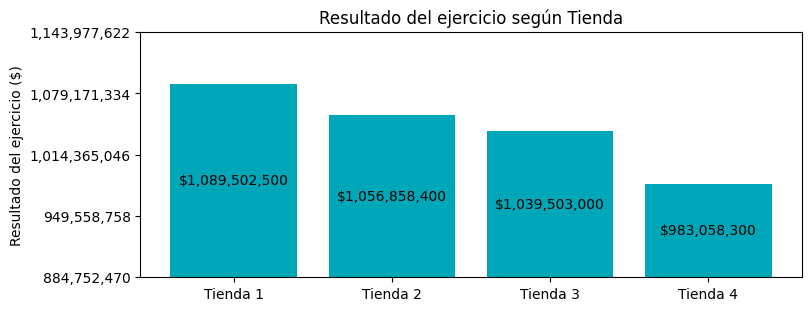

In [ ]:
# Generar el dataframe que contenga las series: Tienda y Resultado del ejercicio
tiendas_pd_resultadoejercicio = tiendas_pd_unificado.groupby("Tienda").agg(
    Ingresos = pd.NamedAgg( column = "Precio", aggfunc = "sum"),
    Costos = pd.NamedAgg( column = "Costo de envío", aggfunc = "sum")
).reset_index()

tiendas_pd_resultadoejercicio["Resultado del ejercicio"] = tiendas_pd_resultadoejercicio["Ingresos"] - tiendas_pd_resultadoejercicio["Costos"]

# Establecemos los datos que usaremos en el gráfico: Categorías del eje X, Valores del eje Y
g3_categorias_eje_x = tiendas_pd_resultadoejercicio["Tienda"]
g3_valores_eje_y = tiendas_pd_resultadoejercicio["Resultado del ejercicio"]

# Establecemos los límites de las barras en el eje Y
g3_limite_superior_eje_y = int(1.05 * g3_valores_eje_y.max()) # El límite máximo es 1.05 veces el resultado máximo.
g3_limite_inferior_eje_y = int(0.9 * g3_valores_eje_y.min()) # El límite mínimo es 0.9 veces el resultado mínimo.
separacion_eje_y = int((g3_limite_superior_eje_y - g3_limite_inferior_eje_y)/4)# Existirán 4 entre los marcadores.

# Establecemos la serie de coordenadas en Y desde donde se graficarán las barras
g3_ubicacion_base_barras=[] # Todas las barras parten desde la coordenada cero en el eje Y.
for i in range(0,len(g3_categorias_eje_x),1):
    g3_ubicacion_base_barras.append(0)


# Se crea una figura y un plano para nuestro gráfico con maplotlib.
fig, ax = plt.subplots(figsize=(8, 3), layout="constrained")

# Se agregan los elementos a nuestro plano con el método bar.
contenedor_g3 = ax.bar(g3_categorias_eje_x, g3_valores_eje_y, width=0.8, bottom = g3_ubicacion_base_barras, color = "#00A7B8")

# Se agregan, en el centro de las barras, las etiquetas con los montos de la serie "Resultado del ejercicio" en formato de número entero y separando los miles con comas.
ax.bar_label(contenedor_g3, labels = [f'${int(valor):,}' for valor in g3_valores_eje_y], label_type="center")

# Se establecen los valores máximos y mínimos que se mostraran en el eje Y
ax.set(ylim=(g3_limite_inferior_eje_y, g3_limite_superior_eje_y), yticks=range(g3_limite_inferior_eje_y, g3_limite_superior_eje_y+1,separacion_eje_y))
    # En gráficos como el de líneas, por estética, conviene limitar la ubicación de las categorías del eje X. En el siguiente ejemplo, se centran dejando un espacio de 0.5 px a sus costados, y con una separación de 1px entre cada categoría.
    # xlim=(-0.5, 3.5), xticks=range(0, 4, 1)

# Debido a que los números grandes se expresan orginalmente en notación cientifica, se usa funcformatter para personalizar el texto que se muestra en los marcadores del eje Y.
ax.ticklabel_format(axis="y",style="plain") # Quitamos la notación científica en los valores del eje Y.
formatter = FuncFormatter(lambda x,__: f"{int(x):,}") # Definimos una función lambda que a partir de valores de marcadores y su posición, los convierte en enteros con separación de miles por coma.
ax.yaxis.set_major_formatter(formatter) # Convertimos los valores del eje Y en cadenas de texto según lo definido en la función formatter.

# Se fija el título del eje y.
ax.set_ylabel("Resultado del ejercicio ($)")

# Se fija el título del gráfico.
ax.set_title("Resultado del ejercicio según Tienda")

# Se muestra el gráfico
plt.show()

## 4. Gráfico de imagen institucional


### Gráfico 4: Distribución de la calificación recibida según tienda
Gráfico de cajas y bigotes, que muestra la distribución de las calificaciones recibidas por los clientes en cada tienda. Una tienda con una baja calificación (mediana menor a 3) y la mayoría de calificaciones similares (cuartil superior e inferior cercano a la mediana) tiene una mala percepción y, en consecuencia, **problemas al fidelizar a sus clientes**.

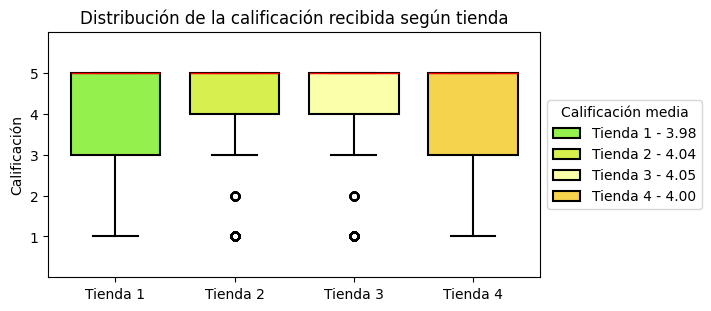

In [ ]:
# Generar el dataframe que contenga las series: Tienda y Calificaciones recibidas
tiendas_pd_calificaciones = tiendas_pd_unificado[["Tienda","Calificación"]]

# Establecemos los datos que usaremos en el gráfico: Etiquetas de los gráficos box-plot, Valores del eje Y
g4_categorias_eje_x = tiendas_pd_unificado["Tienda"].unique() # Generamos una lista con los nombres únicos de las tiendas.

# Creamos un nuevo dataframe que contenga las calificaciones recibidas en columnas diferentes por cada tienda.

# PASO 1: Conocer a cuántas filas limitar los dataframe para que las series tengan la misma cantidad de datos y podamos usar el método ".boxplot" de maplotlib.
tamano_dataframes = [] # Creamos una lista para almacenar la cantidad de filas que tiene cada dataframe

for i,df in enumerate(lista_tiendas_pd): # Iteramos sobre cada dataframe, y añadimos su tamaño a la lista "tamano_dataframes".
    tamano_dataframes.append(len(df))

cantidad_datos_boxplots = min(tamano_dataframes) # Seleccionamos el tamaño del df con la menor cantidad de datos para nuestros boxplots.

# PASO 2: Creamos una función que permita generar los df de calificaciones, uno por cada tienda.
def filtrar_calificaciones(tienda: str = None, tamaño: int = None) -> list:
    '''Función que apartir del nombre de la tienda devuelve una lista con las calificaciones recibidas.

    tienda: str, default None
        Es el nombre de la tienda de interés.

    tamaño: int, default None
        Es la cantidad de datos que filtraremos.

    return = lista_calificaciones: list
        La función devuelve una lista con las calificaciones recibidas por la tienda de interés.
    '''
    df_filtrado = tiendas_pd_calificaciones[tiendas_pd_calificaciones["Tienda"] == tienda] # Filtramos el dataframe de calificaciones según la tienda de interés

    lista_calificaciones = list(df_filtrado["Calificación"].head(tamaño).astype(int)) # Asignamos a una variable los valores de las calificaciones del df filtrado según el tamaño deseado.

    return lista_calificaciones # Retornamos la variable (que es una lista) como resultado de la función.

# PASO 3: Ejecutamos la función tantas veces como tiendas haya, generando los dataframes que uniremos de manera horizontal.
g4_valores_eje_y =  pd.DataFrame() # Creamos el Dataframe con las series de calificaciones (una x tienda), vacío en un comienzo.

for tienda in g4_categorias_eje_x: # Iteramos sobre la lista que contiene el nombre de las tiendas.
    df_calificaciones = pd.DataFrame(data=filtrar_calificaciones(tienda=tienda,tamaño=cantidad_datos_boxplots)) # Por cada tienda, se crea un df con sus calificaciones a partir de la función "filtrar_calificaciones".
    g4_valores_eje_y = pd.concat([g4_valores_eje_y, df_calificaciones], axis=1, ignore_index=True) # En cada iteración, unimos de forma horizontal el df de la tienda al Dataframes general de calificaciones.

g4_valores_eje_y.columns = g4_categorias_eje_x # Cambiamos los nombres de las columnas, asignandole el nombre de su tienda respectiva.

# PASO 4: Se crea una lista con las medias de cada serie de calificaciones

# Con "boxplot_stats" se genera un diccionario de estadística por cada serie de calificaciones que sirven para graficar su boxplot.
estadisticas_calificaciones = cbook.boxplot_stats(g4_valores_eje_y, labels=g4_categorias_eje_x) #estadisticas es una lista de diccionarios.

# Se crea una lista con las medias de cada serie de calificaciones.
medias_calificaciones = []
for indice, diccionario in enumerate(estadisticas_calificaciones): # Se itera sobre cada par (indice, diccionario) de estadisticas_calificaciones.
    medias_calificaciones.append(float(diccionario["mean"])) # Se agrega a la lista de medias, el valor asociado a la clave "Med" en cada diccionario.

# PASO 5: Se grafica las cajas y bigotes correspondiente a cada tienda.

# Se crea una figura y un plano para nuestro gráfico con maplotlib.
fig, ax = plt.subplots(figsize=(7, 3), layout="constrained")

# Se crea una lista con los colores para nuestras cajas
colores_cajas = ['#94F04D', '#D8F04D', '#FAFFA9', '#F5D34D']

# Se agregan los gráficos de boxplots sobre el plano.
b_plots = ax.boxplot(g4_valores_eje_y, positions=[2, 4, 6, 8], widths=1.5, patch_artist=True, # Se indica los valores del eje Y, la posición de los boxplot, la amplitud de cada boxplot, y señala que se coloreará la caja.
                showmeans=False, showfliers=True, tick_labels=g4_categorias_eje_x, # No se muestra la media, se muestra los datos por fuera de los cuartiles, y establece como categorías del eje X a los nombres de las tiendas.
                medianprops={"color": "Red", "linewidth": 1}, # Se configura el color y grosor de la línea de la mediana.
                boxprops={"edgecolor": "black",
                          "linewidth": 1.5}, # Se configura el color y grosor del contorno de la caja.
                whiskerprops={"color": "black", "linewidth": 1.5}, # Se configura el color y grosor de los bigotes.
                capprops={"color": "black", "linewidth": 1.5}, # Se configura el color y grosor de las líneas máxima y mínima de cada bloxplot.
                label=list(map(lambda c,m: f"{c} - {m:.2f}", g4_categorias_eje_x, medias_calificaciones)) # Se asigna a cada bloxplot una etiqueta que contiene su calificación medida, y se muestra en la leyenda.
              )

# Se colorean las cajas según la lista de colores.
for caja, color in zip(b_plots['boxes'], colores_cajas):
    caja.set_facecolor(color)

ax.set(ylim=(0, 6), yticks=list(range(1, 6))) # Se establecen los límites del eje Y.
ax.set_ylabel("Calificación") # Se establece el nombre del eje Y.
ax.legend(loc="lower left", bbox_to_anchor=(1,0.25), title="Calificación media") # Se ubica la leyenda al lado derecho medio del gráfico.
ax.set_title("Distribución de la calificación recibida según tienda") # Se asigna un nombre al gráfico.

plt.show() # Se muestra el gráfico.

## 5. Gráfico de desempeño geográfico

### Gráfico 5: Mapa de burbujas correspondiente al lugar de ventas
Gráfico de burbujas que muestran el monto de las ventas de las tiendas en cada ciudad.

El tamanaño de las burbujas es directamente proporcional a los montos de las ventas, e indican en qué lugares los clientes realizaron compras de mayor cuantía.

Mientras que el color corresponde a los nombres de las tiendas.

Este análisis nos permite identificar visualmente **los lugares y tiendas donde se producen más ventas**.

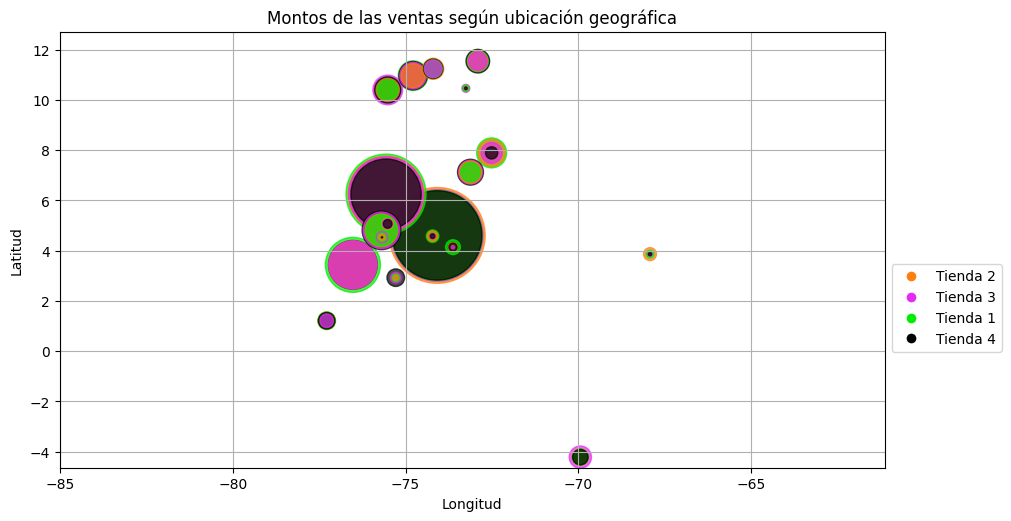

In [ ]:
# PASO 1: Generación del dataframe con los datos que se graficarán.

# Convertimos los valores de "lat" y "lon" a números float.
tiendas_pd_unificado["lat"] = tiendas_pd_unificado["lat"].astype(float)
tiendas_pd_unificado["lon"] = tiendas_pd_unificado["lon"].astype(float)

# Generamos el dataframe agrupado que nos sirva para graficar el tamaño de las ventas según tienda y coordenadas.
tiendas_pd_lugares = tiendas_pd_unificado.groupby(["Tienda", "Lugar de Compra"]).agg(
    Latitud=pd.NamedAgg(column="lat", aggfunc="mean"),
    Longitud=pd.NamedAgg(column="lon", aggfunc="mean"),
    Ventas=pd.NamedAgg(column="Ventas", aggfunc="sum")).reset_index()

# Se ordena el dataframe según las ventas en orden descendente, de forma que las ventas más bajas se graficarán al final y serán más visibles.
tiendas_pd_lugares = tiendas_pd_lugares.sort_values(by="Ventas", ascending=False)

# PASO 2: Asignación de un número a las categorías que se colorearán en el gráfico (mapa categórico).

nombres_tiendas = tiendas_pd_lugares["Tienda"].unique() # Creamos una lista con los nombres de las tiendas.
diccionario_colores = {'Tienda 1': '#00ED00','Tienda 2': '#ff7f0e','Tienda 3': '#E62AF5','Tienda 4': '#000000'} # Creamos un diccionario, cuyas claves corresponden a los nombres de las tiendas y sus valores son los colores distintivos de cada una.
lista_colores = [diccionario_colores[cat] for cat in tiendas_pd_lugares["Tienda"]] # Creamos una lista que convierte los valores de la serie "Tienda" de nuestro df "tiendas_pd_lugares" en colores.

# PASO 3: Calculamos los límites de los ejes X (longitud) y Y (latitud).
g5_limite_superior_eje_y = 1.10 * tiendas_pd_lugares["Latitud"].max()
g5_limite_inferior_eje_y = 1.10 * tiendas_pd_lugares["Latitud"].min()

g5_limite_superior_eje_x = 0.9 * tiendas_pd_lugares["Longitud"].max()
g5_limite_inferior_eje_x = 1.10 * tiendas_pd_lugares["Longitud"].min()

# PASO 4: Reducir el tamaño de los puntos
ventas_transformadas = []
venta_minima = tiendas_pd_lugares["Ventas"].min()

for i, venta in tiendas_pd_lugares["Ventas"].items():
    valor = venta/(venta_minima)
    ventas_transformadas.append(valor)

# PASO 3: Configuración y muestra del gráfico.

fig, ax = plt.subplots(figsize=(10, 5.1), layout='constrained')

ax.scatter(tiendas_pd_lugares["Longitud"], tiendas_pd_lugares["Latitud"], s = ventas_transformadas, c = lista_colores,
           alpha=0.7)

# Creamos una leyenda manual
leyenda_g5 = [Line2D([0], [0], linewidth = 0, marker = "o", color="white", label = tienda,
                  markerfacecolor=diccionario_colores[tienda], markersize=8) for tienda in nombres_tiendas]
    # Se traza una línea falsa, con un solo punto. Su grosor es cero, y color es blanco.
    # El punto tiene el marcador "o". La etiqueta del punto es el nombre de la tienda.
    # El color del marcador se define según el mapa de colores categórico llamado "tab10". El tamaño del marcador es 8 pixeles.
ax.legend(loc="lower left", bbox_to_anchor=(1,0.25), handles = leyenda_g5)

# Establecemos los límites de los ejes
# Se establecen los valores máximos y mínimos que se mostraran en el eje Y
ax.set(xlim=(g5_limite_inferior_eje_x, g5_limite_superior_eje_x),
       ylim=(g5_limite_inferior_eje_y, g5_limite_superior_eje_y))

# Añadimos los títulos a los ejes y al gráfico
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_title("Montos de las ventas según ubicación geográfica")
ax.grid(visible=True)

plt.show()

## 6. Informe final
A continuación se presenta un informe con el análisis de las ventas en las cuatro tiendas del Sr. Juan.

### *Análisis del desempeño financiero*

Se considera como ingresos al dinero que recibe la empresa en el instante que se realiza la compra.  La figura 1 muestra el porcentaje que representa cada tienda en el total de Ingresos, que asciende a más de cuatro mil millones de dólares ($4,403,619,200.00).

Al respecto, la tienda 4 es la que menor participación tuvo con un 23.6% del total ($1,038,375,700.00).

**<p align="center">Figura 1</p>**
<div align="center">

![Figura 1](https://github.com/JLuceroVasquez/challenge-alura-store/blob/main/figuras-reporte-final/figura1.png?raw=1)

</div>

Asimismo, se considera como ventas a todo el dinero que la empresa percibe como ingreso (al instante) y espera percibir cuando el cliente cancele progresivamente sus cuotas. A nivel global, las ventas ascienden a más de trece mil millones de dólares ($13,102,551,000.00) y la figura 2 muestra el porcentaje que representan los ingresos y las cuentas por cobrar del total de ventas en cada tienda. Se aprecia que el mayor porcentaje de cuentas por cobrar sobre las ventas corresponde a la tienda 2, y por lo tanto corre un mayor riesgo de incobrabilidad.

**<p align="center">Figura 2</p>**
<div align="center">

![Figura 2](https://github.com/JLuceroVasquez/challenge-alura-store/blob/main/figuras-reporte-final/figura2.png?raw=1)

</div>

Por otro lado, se considera como resultado del ejercicio a la resta de los ingresos menos los costos de envío de los productos. Entre las cuatro tiendas, la tienda 1 tiene el costo promedio de envío más alto que asciende a más de 26 mil dólares ($26,018.61).

No obstante, pese a tener el costo promedio más bajo ($2,3459.46), la tienda 4 obtuvo las menores ganancias durante el ejercicio según la figura 3. Así la tienda 1 obtuvo ganancias mayores a mil millones de dólares, mientras que la tienda 4 obtuvo ganancias de aproximadamente 900 millones de dólares.

**<p align="center">Figura 3</p>**
<div align="center">

![Figura 3](https://github.com/JLuceroVasquez/challenge-alura-store/blob/main/figuras-reporte-final/figura3.png?raw=1)

</div>

### *Análisis del rendimiento de productos*

Las tiendas venden hasta cincuenta y un productos agrupados en ocho categorías.

Del análisis de ventas según categorías, se encontró que las cuatro tiendas registran más ventas en las categorías electrónicos y electrodomésticos. En contraste, las categorías que registran las menores ventas en todas las tiendas son los libros y los artículos para el hogar. Como recomendación, las tiendas podrían implementar estrategias de marketing que mejoren los niveles de ventas siguiendo los ejemplos de otras tiendas como:
- La tienda 2 para los libros ($31,417,000.00).

- La tienda 3 para los artículos del hogar ($44,724,600.00).

Estas tiendas obtuvieron las mayores ventas para estas categorías en comparación a las demás tiendas.

Del análisis de ventas según productos, se encontró que la diferencia entre la cantidad vendida de los productos más y menos vendidos es de 25 ventas en promedio para las cuatro tiendas. Con base a la cantidad vendida por cada producto, se encontró que los microondas son productos muy solicitados en las tiendas 1 y 2; al igual que las camas King en las tiendas 3 y 4. Se recomienda que estas tiendas enseñen a las demás las estrategias de marketing que aplican en sus productos estrella. En contraste, los guitarras (eléctricas y acústicas) son los productos menos vendidos en la tienda 4 y se le recomienda no aprovisionarse de ellas hasta venderlas.

Mientras que los armarios se venden bien en la tienda 1, son los productos menos vendidos en la tienda 4. De forma similar, las mesas comedor se vende bien en la tienda 3 pero se compra poco en la tienda 2. En ese sentido, se recomienda a las tiendas copiar entre sí las estrategias de marketing para los productos que requieran mejorar.

### *Análisis de la imagen institucional*

La valoración promedio global brindada por los clientes de las cuatro tiendas es 4.01 puntos sobre 5. Al respecto, la figura 4 muestra que alrededor del 25% de valoraciones recibidas por las tiendas 1 y 4 son menores a 3. Siendo la tienda 1 la que menor valoración promedio tiene (3.98) seguida por la tienda 4 (4). Ambas tiendas requieren mejorar su imagen institucional en comparación a las tiendas 2 y 3.

**<p align="center">Figura 4</p>**
<div align="center">

![Figura 4](https://github.com/JLuceroVasquez/challenge-alura-store/blob/main/figuras-reporte-final/figura4.png?raw=1)

</div>

### *Análisis del desempeño geográfico*

Las tiendas atienden a 19 ciudades. De las cuales, las tres ciudades con mayores ventas son Bogotá, Medellín y Cali. La figura 5 muestra la distribución geográfica de las ventas según su monto (representado por el tamaño de la burbuja) y tienda (representada por el color de la burbuja). De gráfico se aprecia que la tienda 4 es la que menor ventas generó en 8 de las 19 ciudades. Con lo cual, la tienda 4 es menos relevante que las demás tiendas en 8 ciudades.

**<p align="center">Figura 5</p>**
<div align="center">

![Figura 5](https://github.com/JLuceroVasquez/challenge-alura-store/blob/main/figuras-reporte-final/figura5.png?raw=1)

</div>

### *Recomendación final*

A partir de los datos, se recomienda al Sr. Juan cerrar la tienda 4. Debido a que generó la menor cantidad de ingresos y ganancias entre todas las tiendas. Además cuenta con un 25% de clientes que valoran la atención por debajo 3 sobre 5. Por último, la tienda 4 es menos relevante que las demás tiendas en 8 de las 19 ciudades que se atienden.

Asimismo, se recomienda al Sr. Juan mejorar la atención y optimizar los costos de la tienda 1. Debido a que, pese a ser la que más ingresos y ganancias generó, la tienda 1 tiene el costo promedio de envío más alto y, al igual que la tienda 4, cuenta con un 25% de clientes que valoran la atención por debajo 3.